In [1]:
import pandas as pd

In [2]:
column_names = ['polarity', 'review']

In [3]:
# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/yelp_review_polarity_csv/train.csv', header=None, names=column_names)

In [4]:
train_df.head()

,polarity,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [5]:
# Load testing data
test_df = pd.read_csv('/content/drive/MyDrive/yelp_review_polarity_csv/test.csv', header=None, names=column_names)

In [6]:
test_df.head()

,polarity,review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [7]:
train_df.describe()

,polarity
count,560000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


In [8]:
test_df.describe()

,polarity
count,38000.000000
mean,1.500000
std,0.500007
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

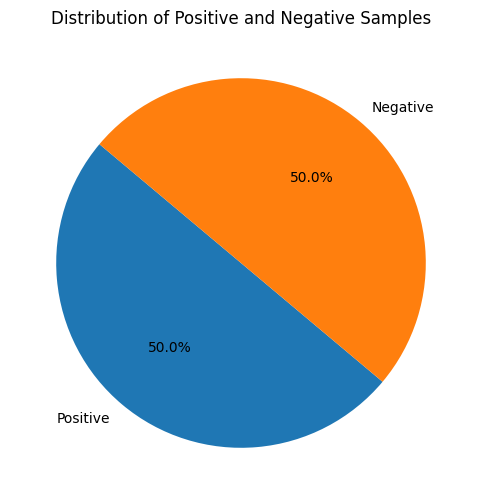

In [10]:
# 1. Pie Chart for Positive and Negative Samples
polarity_counts = train_df['polarity'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(polarity_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Samples')
plt.show()

Inference: Equal No of +ve and -ve samples

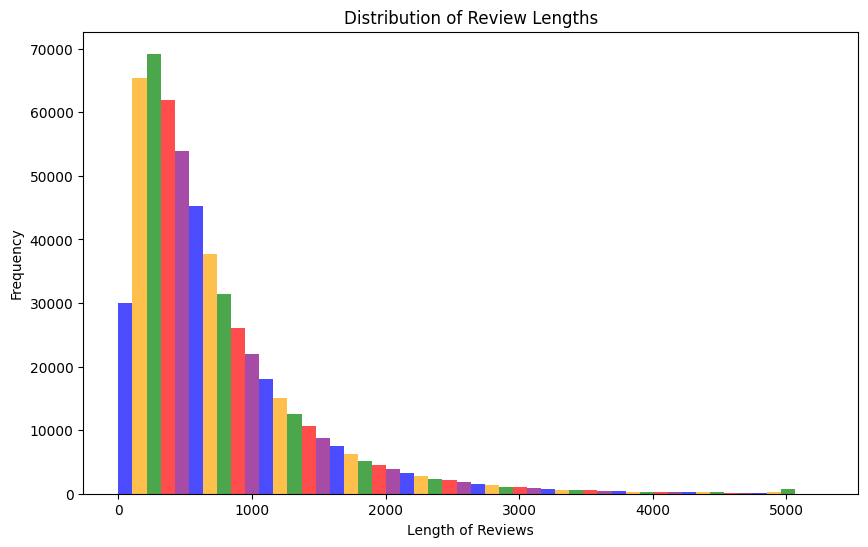

In [11]:
import matplotlib.pyplot as plt

train_df['review_length'] = train_df['review'].apply(len)
plt.figure(figsize=(10, 6))
n_bins = 50
n, bins, patches = plt.hist(train_df['review_length'], bins=n_bins, alpha=0.7)
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i in range(n_bins):
    patches[i].set_facecolor(colors[i % len(colors)])
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.show()


Inference: A majority of reviews are in a small length interval

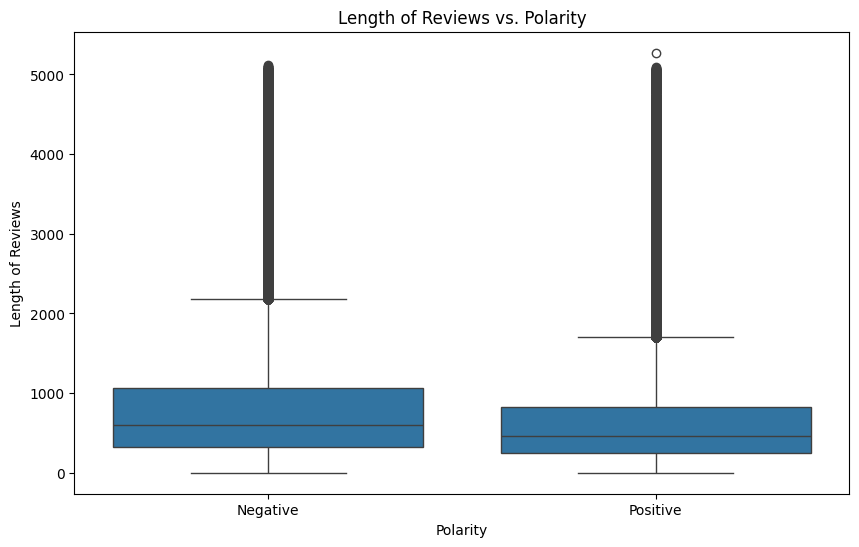

In [12]:
# 3. Length of Reviews vs. Polarity Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='polarity', y='review_length', data=train_df)
plt.title('Length of Reviews vs. Polarity')
plt.xlabel('Polarity')
plt.ylabel('Length of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

There isn't much of difference in length between postive and -ve reviews

In [13]:
!pip install nltk gensim

In [14]:
train_df['polarity'] = train_df['polarity'] - 1
test_df['polarity'] = test_df['polarity'] - 1

In [15]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from gensim.models import Word2Vec

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def preprocess_text(text):
    #lower case conversion
    text = text.lower()

    #making a translation table that'll be applied to remove
    #punctation characters from the text
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization into one or two syllable containing words
    tokens = word_tokenize(text)

    # Remove stopwords by checking if each word is in nltk.stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

In [18]:
train_df['pr_review'] = train_df['review'].apply(preprocess_text)
test_df['pr_review'] = test_df['review'].apply(preprocess_text)

In [19]:
train_df.head()

,polarity,review,review_length,pr_review
0,0,"Unfortunately, the frustration of being Dr. Go...",643,"[unfortunately, frustration, dr, goldbergs, pa..."
1,1,Been going to Dr. Goldberg for over 10 years. ...,495,"[going, dr, goldberg, 10, years, think, one, 1..."
2,0,I don't know what Dr. Goldberg was like before...,1143,"[dont, know, dr, goldberg, like, moving, arizo..."
3,0,I'm writing this review to give you a heads up...,1050,"[im, writing, review, give, heads, see, doctor..."
4,1,All the food is great here. But the best thing...,425,"[food, great, best, thing, wings, wings, simpl..."


In [20]:
test_df.head()

,polarity,review,pr_review
0,1,"Contrary to other reviews, I have zero complai...","[contrary, reviews, zero, complaints, service,..."
1,0,Last summer I had an appointment to get new ti...,"[last, summer, appointment, get, new, tires, w..."
2,1,"Friendly staff, same starbucks fair you get an...","[friendly, staff, starbucks, fair, get, anywhe..."
3,0,The food is good. Unfortunately the service is...,"[food, good, unfortunately, service, hit, miss..."
4,1,Even when we didn't have a car Filene's Baseme...,"[even, didnt, car, filenes, basement, worth, b..."


In [21]:
vocabulary = set(word for review in (list(train_df['pr_review']) + list(test_df['pr_review'])) for word in review)

In [22]:
# # Train a Word2Vec model
# word2vec_model = Word2Vec(sentences=(list(train_df['pr_review']) + list(test_df['pr_review'])), vector_size=100, window=5, min_count=1, workers=4)

In [23]:
# print(word2vec_model.wv['hello'])

In [24]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
import numpy as np

In [25]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [26]:
def create_token_to_idx(vocabulary):
    token_to_idx = {}
    token_to_idx['<pad>'] = 0
    token_to_idx['<unk>'] = len(token_to_idx)
    for i, token in enumerate(vocabulary, start=len(token_to_idx)):
        token_to_idx[token] = i
    return token_to_idx

token_to_idx = create_token_to_idx(vocabulary)

In [27]:
from sklearn.model_selection import train_test_split
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [28]:
X_train, X_val, y_train, y_val = train_test_split(train_df['pr_review'], train_df['polarity'], test_size=0.2, random_state=42)

In [29]:
from torch.nn.utils.rnn import pad_sequence

In [30]:
def tokens_to_tensor(tokens_list, token_to_idx, max_length):
    indexed_tokens = [[token_to_idx.get(token, 0) for token in tokens] for tokens in tokens_list]
    sequences = [torch.tensor(tokens) for tokens in indexed_tokens]
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=0)

    if padded_sequences.size(1) > max_length:
        padded_sequences = padded_sequences[:, :max_length]

    return padded_sequences

In [31]:
max_length = 64

X_train_tensor = tokens_to_tensor(X_train, token_to_idx, max_length)
X_val_tensor = tokens_to_tensor(X_val, token_to_idx, max_length)

y_train_tensor = torch.tensor(y_train.values)
y_val_tensor = torch.tensor(y_val.values)

In [33]:
# Create DataLoaders
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [34]:
X_test_tensor = tokens_to_tensor(test_df['pr_review'], token_to_idx, max_length)
y_test_tensor = torch.tensor(test_df['polarity'].values)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [35]:
vsize = len(vocabulary) + 1
nclasses = 2
edim, nhead = 100, 2
nlayers, fdim = 2, 2048

In [36]:
class TransformerModel(nn.Module):
    def __init__(self, vsize, edim, nhead, nlayers, fdim, nclasses, max_length):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vsize, edim)
        self.pos_embedding = nn.Parameter(torch.zeros(max_length, edim))
        encoder_layer = TransformerEncoderLayer(edim, nhead, fdim)
        self.encoder = TransformerEncoder(encoder_layer, nlayers)
        self.classifier = nn.Linear(edim, nclasses)

    def forward(self, src):
        x = self.embedding(src)
        pos_encoding = self.pos_embedding.unsqueeze(0).expand(src.size(0), -1, -1)
        x += pos_encoding[:, :src.size(1)]
        x = self.encoder(x)
        x = x.mean(dim=1)
        output = self.classifier(x)
        return output

In [37]:
model = TransformerModel(vsize, edim, nhead, nlayers, fdim, nclasses, max_length).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def calculate_accuracy(y_true, y_pred):
    _, predictions = torch.max(y_pred, 1)
    correct = (predictions == y_true).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

num_epochs = 3

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [38]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_accuracy = 0, 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        accuracy = calculate_accuracy(y_batch, output)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += accuracy.item()
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy * 100)

    model.eval()
    total_loss, total_accuracy = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = loss_fn(output, y_batch)
            accuracy = calculate_accuracy(y_batch, output)
            total_loss += loss.item()
            total_accuracy += accuracy.item()
    avg_val_loss = total_loss / len(val_dataloader)
    avg_val_accuracy = total_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy * 100)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Train Accuracy: {avg_train_accuracy}%, Val Loss: {avg_val_loss}, Val Accuracy: {avg_val_accuracy}%')


Epoch 1, Train Loss: 0.35710496050385493, Train Accuracy: 0.8449754464285715%, Val Loss: 0.26159680581199274, Val Accuracy: 0.8975714285714286%
Epoch 2, Train Loss: 0.24665217609889806, Train Accuracy: 0.9032589285714285%, Val Loss: 0.26490333982237746, Val Accuracy: 0.8973839285714286%
Epoch 3, Train Loss: 0.22217175107435988, Train Accuracy: 0.9141897321428571%, Val Loss: 0.2476577178968915, Val Accuracy: 0.9033571428571429%


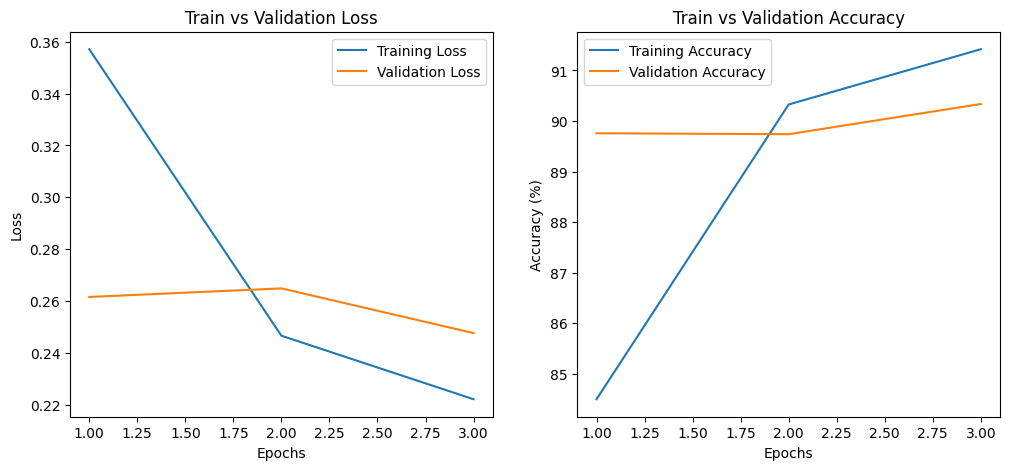

In [39]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

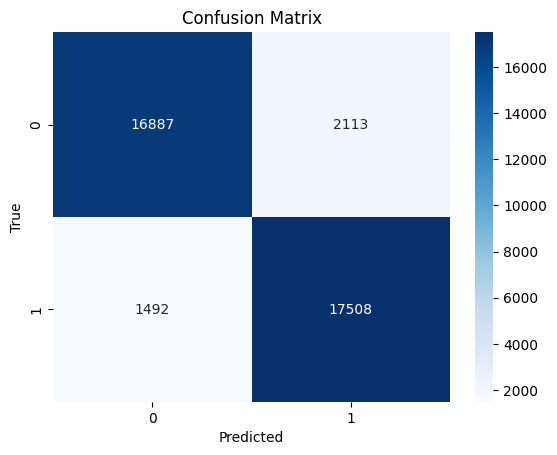

Precision: 0.8923092604862137
Recall: 0.9214736842105263
F1 Score: 0.9066570000776779


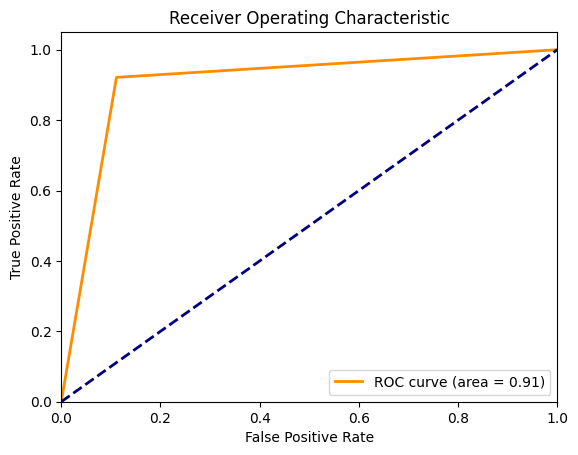

In [40]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import seaborn as sns

y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        output = model(X_batch)
        _, predicted = torch.max(output, 1)
        y_true.extend(y_batch.tolist())
        y_pred.extend(predicted.tolist())

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(f'Precision: {precision}\nRecall: {recall}\nF1 Score: {fscore}')

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
model.eval()
total_loss = 0
total_accuracy = 0
y_true, y_pred = [], []

loss_fn = torch.nn.CrossEntropyLoss()

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        total_loss += loss.item()

        _, predicted = torch.max(output, 1)
        y_true.extend(y_batch.tolist())
        y_pred.extend(predicted.tolist())

        correct = (predicted == y_batch).sum().item()
        total_accuracy += correct / y_batch.size(0)

avg_test_loss = total_loss / len(test_dataloader)
avg_test_accuracy = total_accuracy / len(test_dataloader) * 100

print(f'Testing Loss: {avg_test_loss:.4f}')
print(f'Testing Accuracy: {avg_test_accuracy:.2f}%')

Testing Loss: 0.2981
Testing Accuracy: 88.02%


In [51]:
torch.save(model.state_dict(), 'model_weights.pth')

#Dropout

In [42]:
class TransformerModel(nn.Module):
    def __init__(self, vsize, edim, nhead, nlayers, fdim, nclasses, max_length):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vsize, edim)
        self.pos_embedding = nn.Parameter(torch.zeros(max_length, edim))
        encoder_layer = TransformerEncoderLayer(edim, nhead, fdim)
        self.encoder = TransformerEncoder(encoder_layer, nlayers)
        self.classifier = nn.Linear(edim, nclasses)

    def forward(self, src):
        x = self.embedding(src)
        pos_encoding = self.pos_embedding.unsqueeze(0).expand(src.size(0), -1, -1)
        x += pos_encoding[:, :src.size(1)]
        x = self.encoder(x)
        x = x.mean(dim=1)
        output = self.classifier(x)
        return output

In [45]:
model = TransformerModel(vsize, edim, nhead, nlayers, fdim, nclasses, max_length).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def calculate_accuracy(y_true, y_pred):
    _, predictions = torch.max(y_pred, 1)
    correct = (predictions == y_true).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

num_epochs = 1

In [46]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_accuracy = 0, 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        accuracy = calculate_accuracy(y_batch, output)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += accuracy.item()
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy * 100)

    model.eval()
    total_loss, total_accuracy = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = loss_fn(output, y_batch)
            accuracy = calculate_accuracy(y_batch, output)
            total_loss += loss.item()
            total_accuracy += accuracy.item()
    avg_val_loss = total_loss / len(val_dataloader)
    avg_val_accuracy = total_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy * 100)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Train Accuracy: {avg_train_accuracy}%, Val Loss: {avg_val_loss}, Val Accuracy: {avg_val_accuracy}%')


Epoch 1, Train Loss: 0.3519810749233833, Train Accuracy: 0.8479732142857143%, Val Loss: 0.26987332255073954, Val Accuracy: 0.8935535714285714%


#L2 Regularization

In [47]:
model = TransformerModel(vsize, edim, nhead, nlayers, fdim, nclasses, max_length).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=0.01)

def calculate_accuracy(y_true, y_pred):
    _, predictions = torch.max(y_pred, 1)
    correct = (predictions == y_true).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

num_epochs = 1

In [48]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, total_accuracy = 0, 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        accuracy = calculate_accuracy(y_batch, output)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += accuracy.item()
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy * 100)

    model.eval()
    total_loss, total_accuracy = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = loss_fn(output, y_batch)
            accuracy = calculate_accuracy(y_batch, output)
            total_loss += loss.item()
            total_accuracy += accuracy.item()
    avg_val_loss = total_loss / len(val_dataloader)
    avg_val_accuracy = total_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy * 100)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Train Accuracy: {avg_train_accuracy}%, Val Loss: {avg_val_loss}, Val Accuracy: {avg_val_accuracy}%')

Epoch 1, Train Loss: 0.37279429386981894, Train Accuracy: 0.8297790178571428%, Val Loss: 0.2970106146080153, Val Accuracy: 0.8831696428571428%


#Early Stopping

In [50]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
num_epochs = 3
patience = 1
best_val_loss = np.inf
epochs_no_improve = 0
early_stop = False

for epoch in range(num_epochs):
    model.train()
    total_loss, total_accuracy = 0, 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        accuracy = calculate_accuracy(y_batch, output)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += accuracy.item()
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy * 100)

    model.eval()
    total_loss, total_accuracy = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = loss_fn(output, y_batch)
            accuracy = calculate_accuracy(y_batch, output)
            total_loss += loss.item()
            total_accuracy += accuracy.item()
    avg_val_loss = total_loss / len(val_dataloader)
    avg_val_accuracy = total_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy * 100)

    # Print progress
    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Train Accuracy: {avg_train_accuracy}%, Val Loss: {avg_val_loss}, Val Accuracy: {avg_val_accuracy}%')

    # Early stopping logic
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs.')
            early_stop = True
            break

if not early_stop:
    print("Completed all epochs without early stopping.")

Epoch 1, Train Loss: 0.31256268132451387, Train Accuracy: 0.8741540178571429%, Val Loss: 0.2976584136337042, Val Accuracy: 0.8803125%
Epoch 2, Train Loss: 0.3090190281367728, Train Accuracy: 0.8748325892857143%, Val Loss: 0.3033824353005205, Val Accuracy: 0.8780982142857143%
Early stopping triggered after 2 epochs.
